In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Dataset Overview

In [2]:
df = pd.read_csv("flights.csv")
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [4]:
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [5]:
#Converting 'id' and 'flight' to object data type
df['id'] = df['id'].astype('string')
df['flight'] = df['flight'].astype('string')

In [6]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
df.describe(include='object')

,carrier,tailnum,origin,dest,time_hour,name
count,336776,334264,336776,336776,336776,336776
unique,16,4043,3,105,6936,16
top,UA,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,58665,575,120835,17283,94,58665


# 2. EDA

* For __numerical__ data, we can use a histogram to visualize the data distribution. 
* For __categorical__ data, we can use a bar plot to visualize the frequency of each category.

In [8]:
# Set color for the plots
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()
    
# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

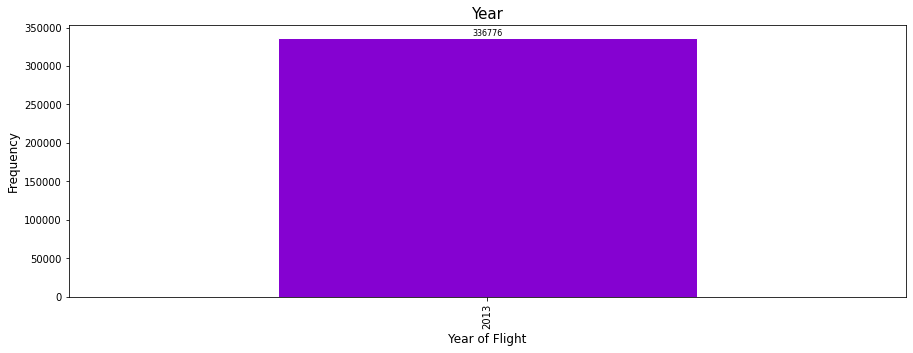

In [9]:
#Plot year
plot_bar(df['year'], 'Year', 'Year of Flight')

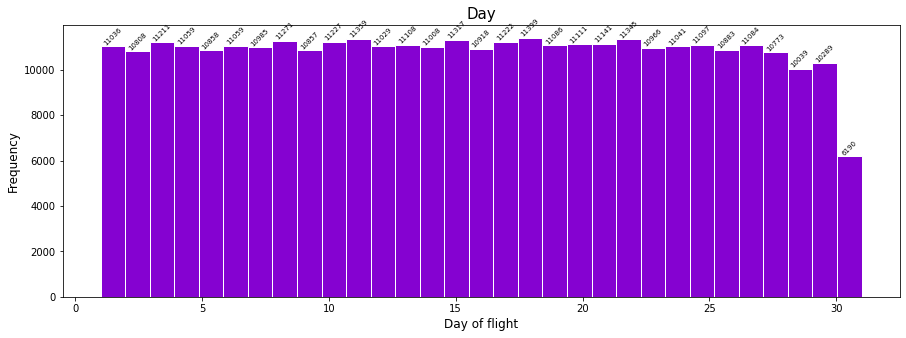

In [10]:
plot_hist(df['day'], xlabel='Day of flight', bins=31, title='Day', fontsize=7, rotation=45) #Plot for day col

### Observation:
The graphs shows that there was even distribution of flights throughout the days of the month

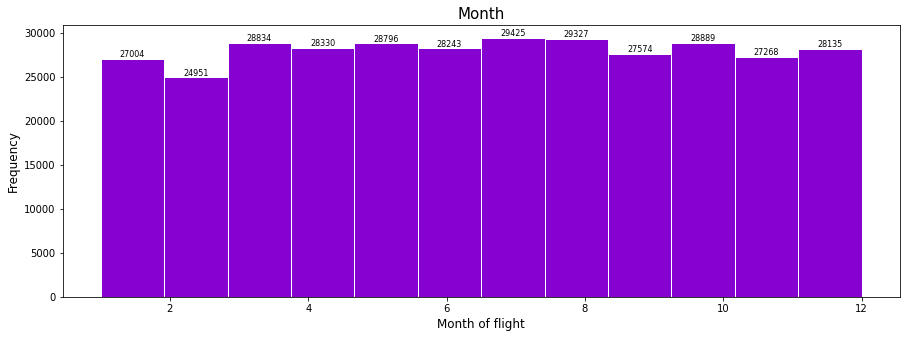

In [11]:
#Plot histogram for month col
plot_hist(df['month'], xlabel='Month of flight', bins=12, title='Month')

### Observation:
The histogram shows that distribution of flights across different month is uniform and that there is slight decrease in __February__.

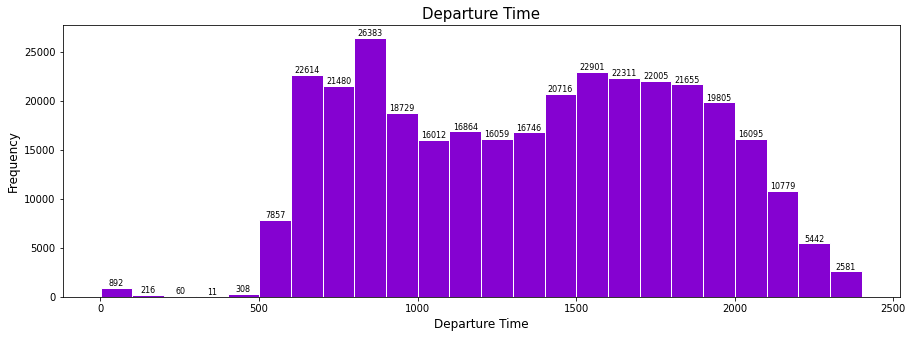

In [12]:
#plot for dept_time
plot_hist(df['dep_time'].dropna(), bins=24, title='Departure Time', xlabel="Departure Time")

### Observation:
The histograph shows that there were fewer flights between 23.00 hrs to 4.00 hrs

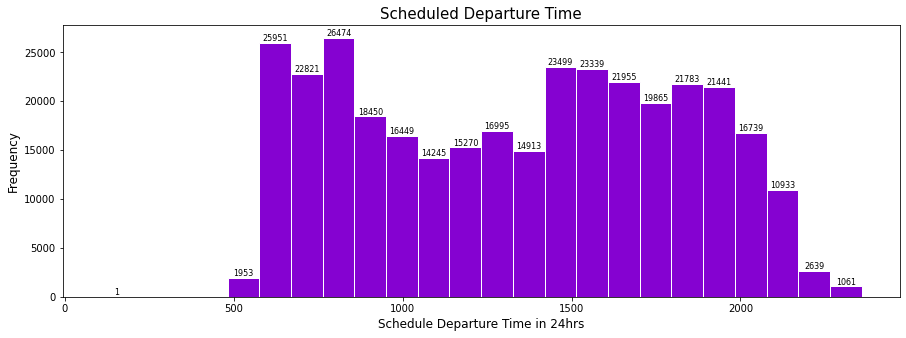

In [13]:
#Plot histogram for sched_dep_time       
plot_hist(df['sched_dep_time'], bins=24, xlabel='Schedule Departure Time in 24hrs', title='Scheduled Departure Time')

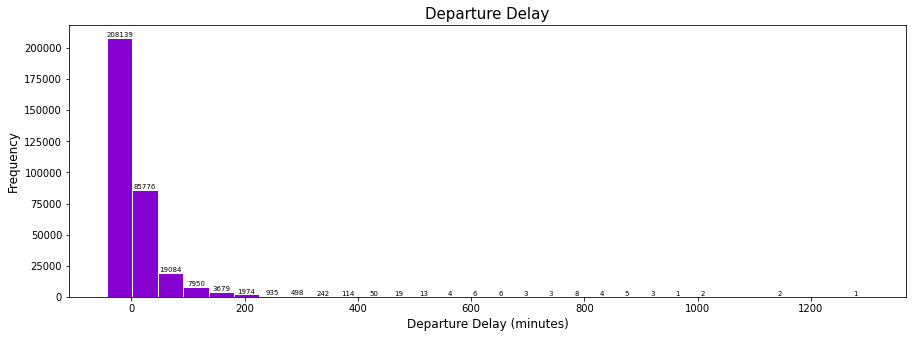

In [14]:
#Plot histogram for dep_delay col
plot_hist(df['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

### Observation:
The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. 
Positive values indicate a delay, while negative values indicate an early departure.

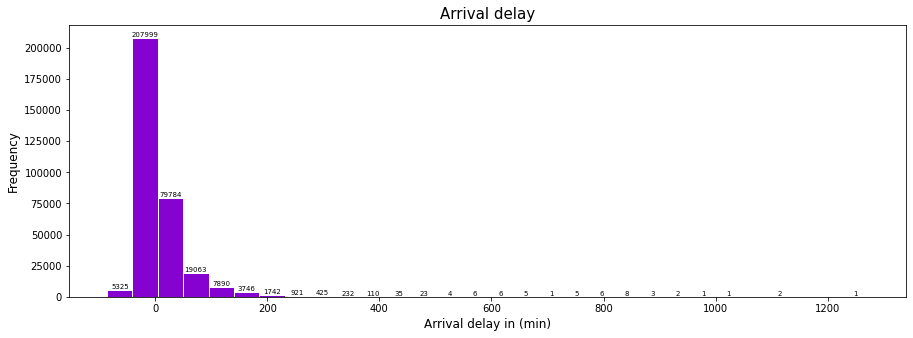

In [15]:
#Plot histogram for arival_delay
plot_hist(df['arr_delay'].dropna(), bins=30, title='Arrival delay', xlabel='Arrival delay in (min)', fontsize=7)

### Observation:
The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. 
Positive values indicate a delay, while negative values indicate an early arrival.

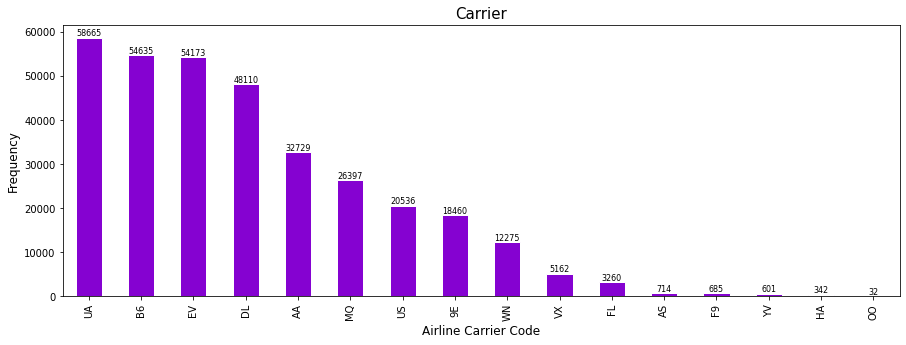

In [16]:
#Plot barplot for 'carrier' col
plot_bar(df['carrier'], 'Carrier', 'Airline Carrier Code')

### Observation:
From the above bar graph we can see that airline carrier __UA__, __B6__, __EV__, __DL__ operate the most flights in the datset

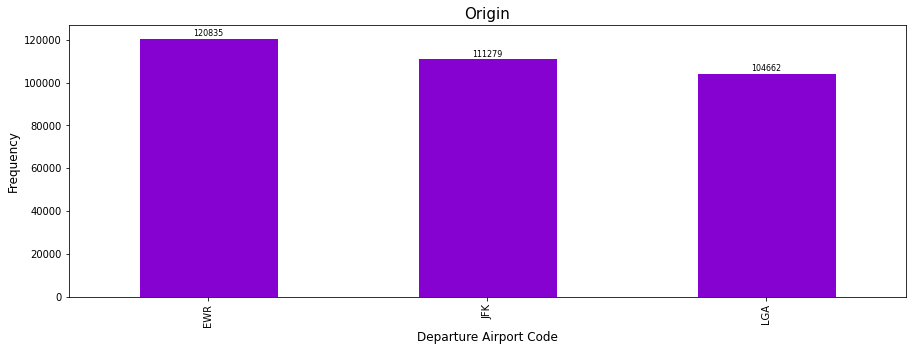

In [17]:
#Plot for origin
plot_bar(df['origin'], 'Origin', 'Departure Airport Code')

### Observation:
The above bar plot illustrates that most flight depart from the __EWR__ airport

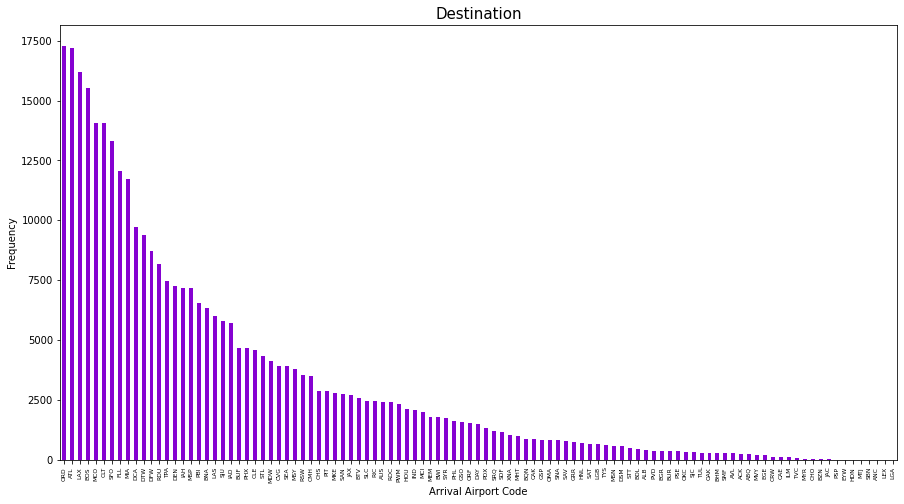

In [18]:
#Plot barplot for 'dist'
plt.figure(figsize=(15, 8))
df['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=6)
plt.show()

### Observation:
The bar plot illustrates that most common destination airports are __ORD__, __ALT__, __LAX__

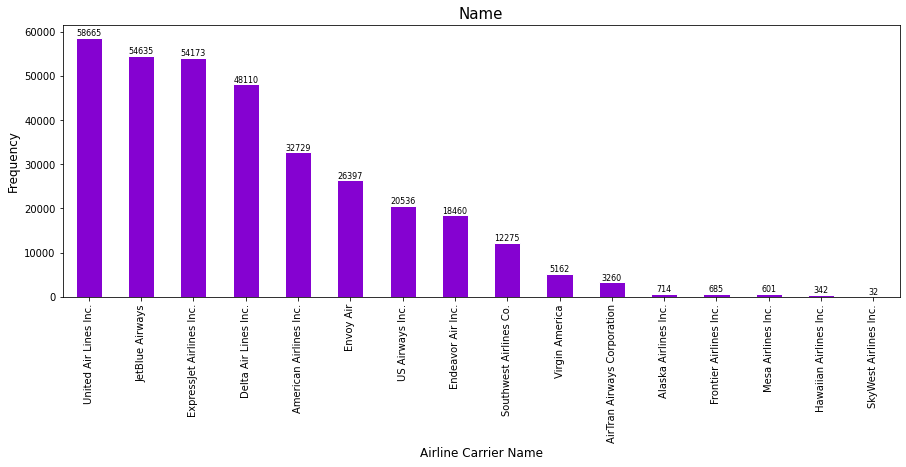

In [19]:
#Plot barplot for 'name' col
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

### Observation:
The barplot shows that airline __United Airline__, __Jetblue Airline__ and __Expressjet Airlines__ has more flights in the datset

#  Data Preprocessing
What is Data Preprocessing?? <br>
Ans - Data Preprocessing is the crusial step in machine learning project, that involves cleaning and transforming raw data into a format that can be understood by machine learning algorithm 

In [20]:
df.drop(['id', 'year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier'], axis=1, inplace=True)

In [21]:
df.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'name'],
      dtype='object')

# Missing Value
What is Missing value?? <br>
Ans - Missing values can disrupt many machine learning algorithms. It's crucial to handle these appropriately
How To handel missing values? <br>
Ans -  
* Drop the rows or columns with missing data, especially if the percentage of missing data is very high.
* Fill the missing data with a central tendency measure (mean, median, or mode).
* Predict the missing values using a machine learning algorithm like KNN.
* Use algorithms that can handle missing values.

In [22]:
missing_per = df.isnull().mean().sort_values(ascending=False) * 100
missing_per

arr_delay         2.800081
air_time          2.800081
arr_time          2.587180
dep_time          2.451184
dep_delay         2.451184
month             0.000000
day               0.000000
sched_dep_time    0.000000
sched_arr_time    0.000000
origin            0.000000
dest              0.000000
distance          0.000000
name              0.000000
dtype: float64

In [23]:
df.dropna(subset=['arr_delay'], inplace=True)
df.reset_index(drop=True, inplace=True) #dropping rows with missing target values (arr_delay) to avoid introducing bias into our model

In [24]:
from sklearn.impute import KNNImputer

In [25]:
#using a K-Nearest Neighbors (KNN) imputer to fill in missing values in other columns.
# Separate features and target
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

0

# Outlier Treatment
What are outliers?? <br>
Outliers are values that stand out from the rest because they're very different. They can sometimes cause problems, especially when we're doing something like regression, where outliers can have a big impact.

# Features Encoding

In [26]:
# Identify categorical columns
cat_columns = X.select_dtypes(include=['object']).columns

# Check the number of unique categories in each categorical feature
X[cat_columns].nunique()

origin      3
dest      104
name       16
dtype: int64

In [27]:
# Check the distribution of categories within each feature
for col in cat_columns:
    print(f"\nDistribution of categories in {col}:")
    print(X[col].value_counts())


Distribution of categories in origin:
EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

Distribution of categories in dest:
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
       ...  
HDN       14
MTJ       14
SBN       10
ANC        8
LEX        1
Name: dest, Length: 104, dtype: int64

Distribution of categories in name:
United Air Lines Inc.          57782
JetBlue Airways                54049
ExpressJet Airlines Inc.       51108
Delta Air Lines Inc.           47658
American Airlines Inc.         31947
Envoy Air                      25037
US Airways Inc.                19831
Endeavor Air Inc.              17294
Southwest Airlines Co.         12044
Virgin America                  5116
AirTran Airways Corporation     3175
Alaska Airlines Inc.             709
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: name, dtype: int64


# One-hot Encoding

In [28]:
# Create a copy of the dataset for encoding
X_encoded = X.copy()

# Apply one-hot encoding to 'carrier', 'origin', and 'name'
X_encoded = pd.get_dummies(X_encoded, columns=['origin', 'name'], drop_first=True)

# Apply frequency encoding to 'dest'
dest_freq = X_encoded['dest'].value_counts() / len(X_encoded)  # calculate the frequencies
X_encoded['dest'] = X_encoded['dest'].map(dest_freq)  # map frequencies to the feature

# Show the result
X_encoded.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,dest,air_time,distance,...,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_Hawaiian Airlines Inc.,name_JetBlue Airways,name_Mesa Airlines Inc.,name_SkyWest Airlines Inc.,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America
0,1,1,517.0,515,2.0,830.0,819,0.021644,227.0,1400,...,0,0,0,0,0,0,0,0,1,0
1,1,1,533.0,529,4.0,850.0,830,0.021644,227.0,1416,...,0,0,0,0,0,0,0,0,1,0
2,1,1,542.0,540,2.0,923.0,850,0.035415,160.0,1089,...,0,0,0,0,0,0,0,0,0,0
3,1,1,544.0,545,-1.0,1004.0,1022,0.002713,183.0,1576,...,0,0,0,1,0,0,0,0,0,0
4,1,1,554.0,600,-6.0,812.0,837,0.051435,116.0,762,...,0,0,0,0,0,0,0,0,0,0
